Análise de Fatura de Cartão de Crédito

* Instalação, leitura e usando as Libs (Pandas e Matplotlib)
* Leitura e oganização da base de dados (faturas.csv)
* Realizando o processo de análise
* Gerando informações apartir da análise dos dados

Passo 01: Usando as bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Passo 02: Leitura da base e organizá-la

In [7]:
dados = pd.read_csv('fatura.csv')
dados.head(10)

,Nome,NumeroCartao,data_compra,hora_compra,categoria,estabelecimento,ValorCompra
0,Ana,4745654042586681,2024-05-08,18:46:33,Vestuário,Loja de Roupas,53.21
1,Carlos,374149440690652,2024-04-22,03:00:47,Farmácia,Loja de Suplementos,159.70
2,Carlos,374149440690652,2024-05-16,22:19:36,Lazer,Show,114.56
3,Maria,374604561384428,2024-05-06,01:13:57,Mercado,Supermercado,101.21
4,Joao,2298930723413634,2024-04-18,02:08:58,Mercado,Mercado,32.03
5,Carlos,374149440690652,2024-04-21,03:17:30,Viagem,Hotel,23.37
6,Maria,374604561384428,2024-05-07,19:24:10,Eletrônicos,Loja de Eletrônicos,34.79
7,Maria,374604561384428,2024-05-11,10:05:53,Mercado,Mercado,259.72
8,Ana,4745654042586681,2024-04-01,02:07:42,Vestuário,Boutique,251.89
9,Maria,374604561384428,2024-05-04,01:10:51,Eletrônicos,Tecnologia,70.06


Passo 03: Processo de Análise dos dados

* Valor tatol da fatura

In [14]:
valor_total_cartao = dados['ValorCompra'].sum()
print(valor_total_cartao)

14811.75


* Valor gasto por titular / pessoa

In [26]:
valor_gasto_titular=dados.groupby('Nome')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra', ascending=False)
valor_gasto_titular

,Nome,ValorCompra
0,Ana,5763.10
1,Carlos,3701.59
3,Maria,2784.91
2,Joao,2562.15


* Valor gasto por Categoria

In [35]:
valor_gasto_categoria = dados.groupby('categoria')['ValorCompra'].sum().reset_index().sort_values(by='ValorCompra', ascending=False)
valor_gasto_categoria

,categoria,ValorCompra
0,Alimentação,2460.06
1,Eletrônicos,2350.01
5,Transporte,2186.05
7,Viagem,1893.79
6,Vestuário,1739.94
2,Farmácia,1714.60
4,Mercado,1495.00
3,Lazer,972.30


* Dias que mais ocoreram gastos

In [43]:
gastos_dia = dados.groupby('data_compra')['ValorCompra'].sum().reset_index()
gastos_dia.sort_values(by='ValorCompra', ascending=False)
gastos_dia.head()

,data_compra,ValorCompra
0,2024-04-01,455.73
1,2024-04-02,486.65
2,2024-04-03,153.34
3,2024-04-04,239.86
4,2024-04-05,569.11


Passo 04: Gera os gráficos

* Gráficos dos Gastos por Titular

Text(0, 0.5, 'Valor')

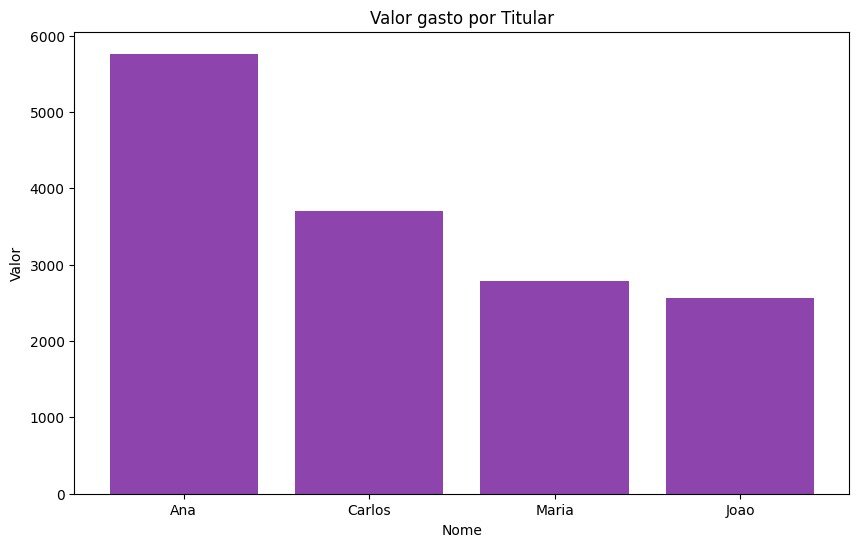

In [51]:
plt.figure(figsize=(10,6))
plt.bar(valor_gasto_titular['Nome'], valor_gasto_titular['ValorCompra'], color='#8e44ad')
plt.title('Valor gasto por Titular')
plt.xlabel('Nome')
plt.ylabel('Valor')

* Gastos por Categoria

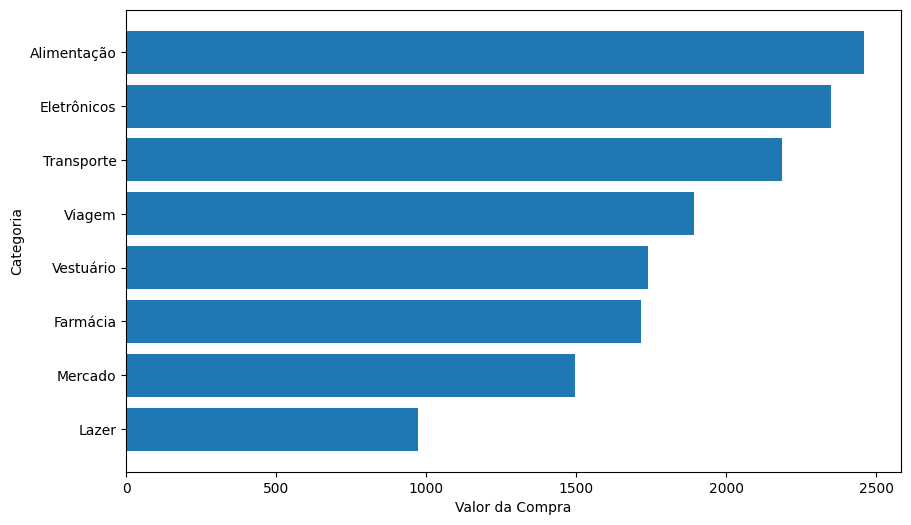

In [63]:
plt.figure(figsize=(10,6))
plt.barh(valor_gasto_categoria['categoria'], valor_gasto_categoria['ValorCompra'])
plt.xlabel('Valor da Compra')
plt.ylabel('Categoria')
plt.gca().invert_yaxis()




* Gráfico de Pizza

Text(0.5, 1.0, 'Distribuição dos gastos por titular')

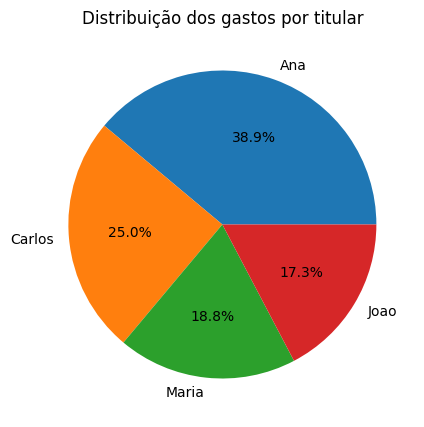

In [60]:
plt.figure(figsize=(5,5))
plt.pie(valor_gasto_titular['ValorCompra'], labels=valor_gasto_titular['Nome'], autopct='%1.1f%%')
plt.title('Distribuição dos gastos por titular')


* Gastos por Mês

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42],
 [Text(0, 0, '2024-04-01'),
  Text(1, 0, '2024-04-02'),
  Text(2, 0, '2024-04-03'),
  Text(3, 0, '2024-04-04'),
  Text(4, 0, '2024-04-05'),
  Text(5, 0, '2024-04-07'),
  Text(6, 0, '2024-04-08'),
  Text(7, 0, '2024-04-09'),
  Text(8, 0, '2024-04-10'),
  Text(9, 0, '2024-04-11'),
  Text(10, 0, '2024-04-13'),
  Text(11, 0, '2024-04-14'),
  Text(12, 0, '2024-04-15'),
  Text(13, 0, '2024-04-16'),
  Text(14, 0, '2024-04-17'),
  Text(15, 0, '2024-04-18'),
  Text(16, 0, '2024-04-19'),
  Text(17, 0, '2024-04-20'),
  Text(18, 0, '2024-04-21'),
  Text(19, 0, '2024-04-22'),
  Text(20, 0, '2024-04-23'),
  Text(21, 0, '2024-04-24'),
  Text(22, 0, '2024-04-25'),
  Text(23, 0, '2024-04-26'),
  Text(24, 0, '2024-04-27'),
  Text(25, 0, '2024-04-28'),
  Text(

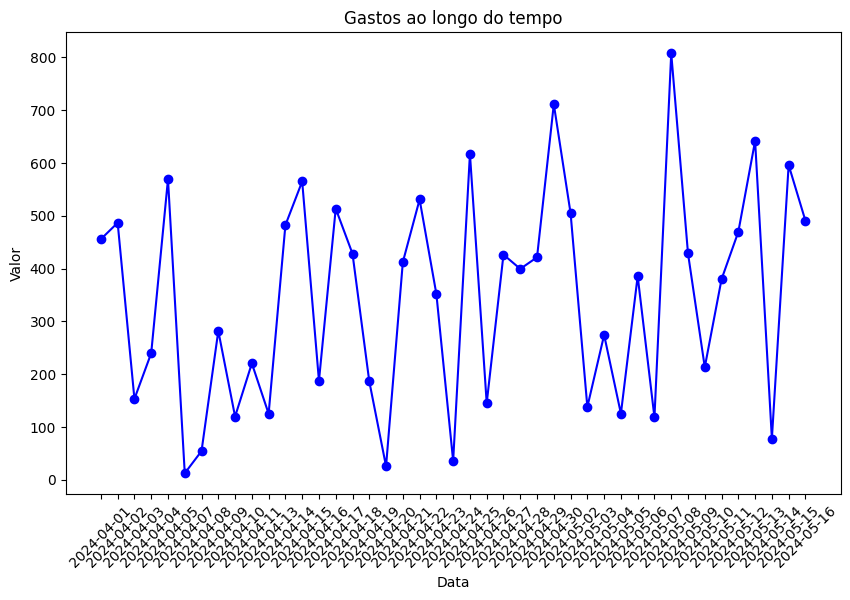

In [64]:
plt.figure(figsize=(10,6))
plt.plot(gastos_dia['data_compra'], gastos_dia['ValorCompra'], marker='o', linestyle='-', color='b')
plt.title('Gastos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.xticks(rotation=45)